# Imports
<hr>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Features Description
<hr>

In [2]:
with open("DATA/Ames_Housing_Feature_Description.txt", mode='r') as file:
    print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# Load & Explore Data
<hr>

In [3]:
df = pd.read_csv('DATA/Ames_Housing_Data.csv')

In [4]:
df.head(5)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Size of the DataFrame

In [5]:
print(f"Number of features : {len(df.columns)}")

Number of features : 81


In [6]:
print(f"Number of data points : {len(df)}")

Number of data points : 2930


### Features Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

### Removing the PID

We already have an index, so we don't need the PID unique identifier for the regression we will perform later on.

In [8]:
df.drop('PID', axis=1, inplace=True)

# Exploratory Data Analysis

<Figure size 800x500 with 0 Axes>

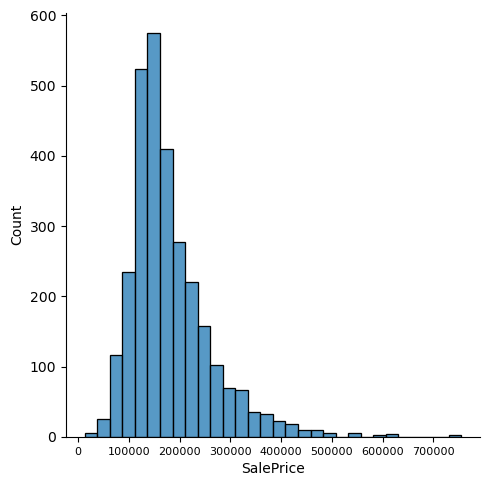

In [23]:
plt.figure(figsize=(8,5))
sns.displot(df['SalePrice'], bins=30)
plt.xticks(fontsize=8);

The distribution of SalePrice is right-skewed.

# NaN Values - Cleaning Data
<hr>

## Observing NaN Values

In [ ]:
df.isna().sum().sort_values(ascending=False)[:10]

In [ ]:
((100 * df.isna().sum() / len(df)).round(2)).sort_values(ascending=False)[:10]

In [ ]:
def percent_missing(df: pd.DataFrame) -> pd.Series:
    """
    Calculate the percentage of missing values for each column in a Pandas DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame for which missing values need to be calculated.

    Returns:
        pd.Series: A Pandas Series containing the percentage of missing values for each column with missing data.
    """
    # Calculate the percentage of missing values for each column
    prc_missing = (100 * df.isna().sum() / len(df)).round(2).sort_values()
    
    # Filter out columns with no missing values (percentage = 0)
    prc_missing = prc_missing[prc_missing > 0]
    
    return prc_missing

In [ ]:
prc_missing = percent_missing(df)

In [ ]:
prc_missing

In [ ]:
sns.barplot(x=prc_missing.index, y=prc_missing.values)
plt.xticks(rotation=90);

## Cleaning NaN Values
### Rows:

#### First Approach : Filling in Data
Choosing 1% as a threshold to fill in missing data

In [ ]:
prc_missing[prc_missing < 1]

In [ ]:
sns.barplot(x=prc_missing.index, y=prc_missing.values)
plt.xticks(rotation=90)
plt.ylim(0,1);

**Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

The numerical basement columns:

In [ ]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

The string basement columns:

In [ ]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before.

In [ ]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [ ]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

#### Second Approach : Dropping Rows

In [ ]:
df = df.dropna(axis=0, subset=['Electrical','Garage Cars'])

In [ ]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(1,100);

### Columns

#### First Approach : Filling in Data

<h5> Garage Columns</h5>
Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [ ]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

In [ ]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [ ]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [ ]:
percent_nan

#### Second Approach: Dropping Feature Columns

Sometimes you may want to take the approach that above a certain missing percentage threshold, you will simply remove the feature from all the data. For example if 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. In our particular data set, many of these high percentage NaN features are actually plasceholders for "none" or 0. But for the sake of showing variations on dealing with missing data, we will remove these features, instead of filling them in with the appropriate value.

In [ ]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

In [ ]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence', 'Fireplace Qu'],axis=1)

In [ ]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Imputation of Missing Data


To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [ ]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

In [ ]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [ ]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
percent_nan

# Creating Dummy Variables
<hr>

### MS Subclass

In [ ]:
df['MS SubClass'].info()

In [ ]:
# Convert to String
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [ ]:
df_obj = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

In [ ]:
df_num

In [ ]:
df_obj

In [ ]:
df_obj = pd.get_dummies(df_obj, drop_first=True)

In [ ]:
df_obj

In [ ]:
final_df = pd.concat([df_num, df_obj], axis=1)

In [ ]:
final_df

In [ ]:
final_df.to_csv('DATA/final_df.csv')